In [15]:
%run ../setup_notebook.ipynb

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
# notebook specific imports
from utils import cacher
import pickle
from termcolor import cprint
import json
from subsets_analysis import Subsets

In [17]:
pkl_path = '/home/jrowland/mnt/qnap/run_pkls'
if not os.path.exists(pkl_path):
    os.mkdir(pkl_path)



Run Number 21

/home/jrowland/mnt/qnap/Data/2021-03-09
['/home/jrowland/mnt/qnap/Data/2021-03-09/blimp/2021-03-09-175800']
['/home/jrowland/mnt/qnap/Data/2021-03-09/naparm/2021-03-09_RL123_002']
['/home/jrowland/mnt/qnap/Data/2021-03-09/RL123-2021-03-09-180217.txt', '/home/jrowland/mnt/qnap/Data/2021-03-09/2021-03-09_RL123_t-002.paq', '/home/jrowland/mnt/qnap/Data/2021-03-09/RL123-2021-03-09-175029.txt']
['/home/jrowland/mnt/qnap/Data/2021-03-09/2021-03-09_RL123_t-002']
['/home/jrowland/mnt/qnap/Data/2021-03-09/2021-03-09_RL123_t-003']
['/home/jrowland/mnt/qnap/Data/2021-03-09/2021-03-09_RL123_t-004']
['/home/jrowland/mnt/qnap/Data/2021-03-09/2021-03-09_RL123_t-005']
['/home/jrowland/mnt/qnap/Data/2021-03-09/2021-03-09_RL123_t-006']
['/home/jrowland/mnt/qnap/Data/2021-03-09/2021-03-09_RL123_t-007']
['/home/jrowland/mnt/qnap/Data/2021-03-09/2021-03-09_RL123_t-008']
['/home/jrowland/mnt/qnap/Data/2021-03-09/2021-03-09_RL123_t-009']
['/home/jrowland/mnt/qnap/Data/2021-03-09/2021-03-09_R

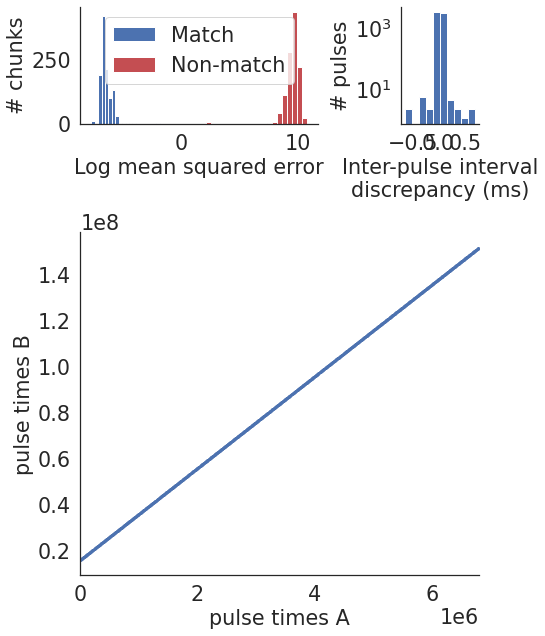

In [18]:
mouse_id = 'RL123'

run_numbers = [21] 

for run_number in run_numbers:
    
    cprint('\n\nRun Number {}\n'.format(run_number), attrs=['bold'])
    
    cacher.main(mouse_id, run_number, pkl_path,   
                reprocess=True, reload=True, do_s2p=False, do_flu_preprocess=False)

In [7]:
## I used the below to figure out and debug the s1/s2 border code

In [12]:

# with open('/home/jrowland/Documents/code/Vape/s2_position.json') as json_file:
#     s1s2_border_json = json.load(json_file)i
    
# s1s2_border = s1s2_border_json[mouse][str(run_number)]

# # self.s2_bool = self.av_xpix > self.s1s2_border
# # self.s1_bool = np.logical_not(self.s2_bool)


In [13]:
# im = np.zeros((514,1024))

# ever_targeted = np.any(session.is_target, axis=(1,2))

# x1, y1, x2, y2 = s1s2_border
# plt.plot([x1, x2], [y1, y2])


# bool_ = ever_targeted
# bool_ = session.s2_bool
# bool_ = [True] *len(session.s1_bool)
# for x,y in zip(session.av_xpix[bool_], session.av_ypix[bool_]):
#     x = int(x)
#     y = int(y)
#     im[y-5:y+5, x-5:x+5] = 1

# plt.imshow(im)

# plt.axvline(700)

In [19]:
def load_run(mouse, run_number, pkl_path):
    run_path = os.path.join(pkl_path, mouse, f'run{run_number}.pkl')
    with open(run_path, 'rb') as f:
        run = pickle.load(f)
    return run

In [20]:
mouse = 'RL123'
run_number = 21
run = load_run(mouse, run_number, pkl_path)

In [21]:
def get_subset_dprime(run):
    
    trial_subsets = Subsets(run).trial_subsets
    assert trial_subsets.shape == run.outcome.shape
    
    fp_rate = sum(run.outcome=='fp') / (sum(run.outcome=='fp') + sum(run.outcome=='cr'))
    subset_dprimes = []
    for subset in [[5],[10],[20],[30],[40],[50], [150]]:
        idx = np.isin(trial_subsets, subset)
        outcome = run.outcome[idx]
        hit_rate = sum(outcome=='hit') / (sum(outcome=='hit') + sum(outcome=='miss'))
        subset_dprimes.append(utils.d_prime(hit_rate, fp_rate)) 
    return subset_dprimes

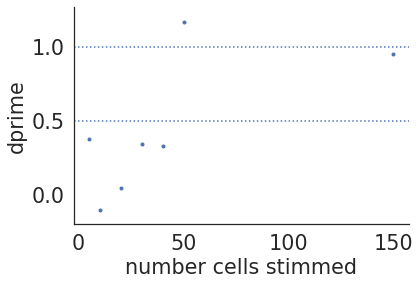

In [22]:
subset_dprimes = get_subset_dprime(run)
plt.plot([5,10,20,30,40,50,150], subset_dprimes, '.')
plt.xlabel("number cells stimmed")
plt.ylabel('dprime')
plt.ylim(min(subset_dprimes)-0.1, max(subset_dprimes)+0.1)

plt.axhline(0.5, linestyle=':')
plt.axhline(1, linestyle=':')
